In [1]:
import os
import numpy as np
import pandas as pd
from scipy.optimize import *
from lmfit import Model
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import datetime

date = datetime.datetime.now().strftime('%a, %d %b %Y %H-%M-%S %Z(%z)')
%matplotlib inline

#### Exposure Intensity ($mW/cm^2$)

In [2]:
# creating an empty list for exposure intensity, I_o is the recording beam intensities. I_o = I_1 and I_2 
#I_1 and I_2 represent the intensity of the signal and the reference beams
I_o = [] #exposure intensity
  
# number of elements as input 
n = int(input("# Enter number of Intensity to vary: ")) 
  
# iterating over the range of the specified number of exposure intensity to be considered 
for i in range(0, n): 
    intensity = float(input("Enter Intensity: ")) 
  
    I_o.append(intensity) # adding the newly entered exposure intensity to the list of exposure intensities
#I_o = np.array(I_o)
      
print("Exposure Intensity to vary: ", I_o)

# Enter number of Intensity to vary: 25
Enter Intensity: 0.1
Enter Intensity: 0.2
Enter Intensity: 0.25
Enter Intensity: 0.3
Enter Intensity: 0.35
Enter Intensity: 0.4
Enter Intensity: 0.45
Enter Intensity: 0.5
Enter Intensity: 0.6
Enter Intensity: 0.8
Enter Intensity: 1.0
Enter Intensity: 2
Enter Intensity: 3
Enter Intensity: 4
Enter Intensity: 5
Enter Intensity: 6
Enter Intensity: 7
Enter Intensity: 8
Enter Intensity: 9
Enter Intensity: 10
Enter Intensity: 12.5
Enter Intensity: 15
Enter Intensity: 16.5
Enter Intensity: 17.5
Enter Intensity: 18
Exposure Intensity to vary:  [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.8, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.5, 15.0, 16.5, 17.5, 18.0]


#### Exposure Time ($seconds$)

In [3]:
# creating an empty list for exposure time t 
t = []  #Exposure time, t
  
# number of elements to be considered as exposure time input
n = int(input("# Enter number of time to vary : ")) 
  
# iterating over the number of exposure time specified 
for i in range(0, n): 
    exp_time = float(input("Enter time: ")) 
  
    t.append(exp_time) # adding the newly entered time to the list of exposure time in seconds 
#t = np.array(t)      
print("Exposure time to measure: ", t)

# Enter number of time to vary : 100
Enter time: 0.15
Enter time: 0.2
Enter time: 0.4
Enter time: 0.6
Enter time: 0.8
Enter time: 1.0
Enter time: 2
Enter time: 3
Enter time: 4
Enter time: 5
Enter time: 6
Enter time: 7
Enter time: 8
Enter time: 9
Enter time: 10
Enter time: 11
Enter time: 12
Enter time: 13
Enter time: 14
Enter time: 15
Enter time: 16
Enter time: 17
Enter time: 18
Enter time: 19
Enter time: 20
Enter time: 21
Enter time: 22
Enter time: 23
Enter time: 24
Enter time: 25
Enter time: 26
Enter time: 27
Enter time: 28
Enter time: 29
Enter time: 30
Enter time: 31
Enter time: 32
Enter time: 33
Enter time: 34
Enter time: 35
Enter time: 36
Enter time: 37
Enter time: 38
Enter time: 39
Enter time: 40
Enter time: 41
Enter time: 42
Enter time: 43
Enter time: 44
Enter time: 45
Enter time: 46
Enter time: 47
Enter time: 48
Enter time: 49
Enter time: 50
Enter time: 51
Enter time: 52
Enter time: 53
Enter time: 54
Enter time: 55
Enter time: 56
Enter time: 57
Enter time: 58
Enter time: 59
Ente

#### Input Parameters

In [4]:
#def inputparameters():
#u = input("Concentration of the monomer: ")
u_m = input("Initial Monomer Concentration: ") #typical value 
#D = input("Diffusion coefficient: ")
#I = input("Light intensity: ")
k_o = input("Polymerization coefficient: ") #value can be modified based on experiment e.g 0.45
tau_d = input("Diffusion time constant τD: ") #value can be modified based on experiment e.g 3.5
#t = input("Exposure time: ") #uncomment to run for a single number 
#I_o = input("Exposure Intensity: ") #uncomment to run for a single number
phi = 0.0082 #constant relating to material φ
delta_nm = input("Maximum amplitude of the grating modulation: ") #Delta_n_M = Cn*δ*U_m e.g. 0.0143
m = 1 #constant
I_t = 0.01 #Lowest intensity required for the material exposure that can be measured by the experiemnt
t_p = input("Polymerization time: ") #Smaller than exposure time t typycal is 8.2, 3.1
w = 10^5;
small_delta = 0.90 #Order of photochemical reaction δ
C_n = float(delta_nm)/(float(small_delta)*float(u_m))
gamma = float(k_o)/phi  #constant 54.8780, 0.0143
print ("\n", "\n", "Input Parameters\n", "Initial Monomer Concentration 𝑈𝑚: ", u_m, "\n", "Polymerization coefficient Ko: ", k_o, "\n", 
            "Diffusion time constant τD: ", tau_d, "\n","Maximum amplitude of the grating modulation Δ𝑛𝑚: ", delta_nm, "\n",
           "Polymerization time tp: ", t_p, "\n", "\n", "Constants\n", "m: ", m, "\n","C_n: ", C_n,"\n", 
            "Lowest Intensity required I_t: ", I_t, "\n","phi φ: ", phi, "\n","Order of magnitude of light reaction δ: ", small_delta,"\n", "Gamma: ", gamma, "\n",
            "Model Accuracy Constant (w): ", w)
    
#    return (u_m, k_o,tau_d, delta_nm, t_p, m, C_n, I_t, phi, small_delta, gamma, w)    

def writeinput():
    all_ = ["Date: ", str(date), "\n", "\n", "Input Parameters\n", "Initial Monomer Concentration 𝑈𝑚: ", str(u_m),  "\n", "Polymerization coefficient Ko: ", str(k_o), "\n", 
           "Diffusion time constant τD: ", str(tau_d), "\n", "Maximum amplitude of the grating modulation Δ𝑛𝑚: ", str(delta_nm), "\n", 
           "Polymerization time tp: ", str(t_p), "\n", "\n", "Constants\n", "m: ", str(m), "\n", "C_n: ", str(C_n), "\n",  "Lowest Intensity required I_t: ", str(I_t), "\n",
            "phi φ: ", str(phi), "\n", "Order of magnitude of light reaction δ: ", str(small_delta), "\n", "Gamma: ", str(gamma), "\n", "Model Accuracy Constant (w): ", str(w), "\n" ]
    return (all_)

Initial Monomer Concentration: 2.5
Polymerization coefficient: 0.45
Diffusion time constant τD: 3.5
Maximum amplitude of the grating modulation: 0.0143
Polymerization time: 3.1

 
 Input Parameters
 Initial Monomer Concentration 𝑈𝑚:  2.5 
 Polymerization coefficient Ko:  0.45 
 Diffusion time constant τD:  3.5 
 Maximum amplitude of the grating modulation Δ𝑛𝑚:  0.0143 
 Polymerization time tp:  3.1 
 
 Constants
 m:  1 
 C_n:  0.006355555555555555 
 Lowest Intensity required I_t:  0.01 
 phi φ:  0.0082 
 Order of magnitude of light reaction δ:  0.9 
 Gamma:  54.8780487804878 
 Model Accuracy Constant (w):  15


### Diffusion Model Theory

***References:***  
1.  G. Zhao and P. Mouroulis, “Diffusion model of hologram formation in dry photopolymer materials,” J. Mod. Opt. 41, 1929–1939 (1994).  
2. S. Gallego, C. Neipp, M. Ortuño, A. Beléndez, E. Fernández, and I. Pascual, “Analysis of monomer diffusion in depth in photopolymer materials,” Opt. Commun. 274, 43–49 (2007)  
3. S. Piazzolla and B. K. Jenkins, “First-harmonic diffusion model for holographic grating formation in photopolymers,” J. Opt. Soc. Am. B 17, 1147–1157 (2000).  
4. H. Li, Y. Qi, R. E. Malallah, and J. T. Sheridan, “Three-dimensional numerical model of holographic grating formation in photopolymer materials,” Proc. SPIE 9508, 95080B (2015)  
5. J. Christmann, C. Ley, X. Allonas, A. Ibrahim, and C. CroutxéBarghorn, “Experimental and theoretical investigations of free radical photopolymerization: Inhibition and termination reactions,” Polymer 160, 254–264 (2019)  
6. Ma, J., Wu, T., Cui, Y., Li, J., Wang, J. and Su, P., 2020. Modified monomer diffusion model for volume holographic grating formation in photopolymers. Applied Optics, 59(13), pp.3952-3958.  

****

##### Historical Review
* ***Zhao et al***. solved diffusion equation for sinusoidal exposure in photopolymers using low-order harmonic approximation [1]   
    + _Found that monomer concentration has monotonic relationship with refractive index modulation_ <br>
    + _Monomer molecules diffusion was responsible for volume holographic grating_  

$$\frac{du(x,t)}{dt} = \frac{\partial }{\partial x} \left({D(x,t)\frac{u(x,t)}{dx}} \right) - F(x,t)u(x,t)$$

 where:

<p style="text-align: left;">    
    <br> $u(x,t)$ is monomer concentration    <br>
    $F(x,t)$ is rate of polymerization    <br>
    $D(x,t)$ is diffusion coefficient    <br>
</p>


* ***Piazolla and Jenkins***. used first order diffusion equation to obtain specific analytical solution of the monomer diffusion model [3]  
   +  _Considered photopolymers and free monomer diffusion during holographic exposure_ <br>
   +  _Predicts variation in the saturated diffraction efficiency with exposure intensity_ <br>
   + _Basic equation proposed is_:
    
$$\frac{du(x,t)}{dt} = \frac{\partial }{\partial x} D  \frac{\partial }{\partial x}u(x,t) - k(t)I^\delta u(x,t)$$

 where:

<p style="text-align: left;">    
    <br> $u(x,t)$ is monomer concentration    <br>
    $D$ is diffusion coefficient    <br>
    $k(t)$ is polymerization coefficient    <br>
    $I(x)$ is light intensity    <br>
    $\delta$ is the order of photochemical reaction    <br>
    $k(t)I^\delta(x)$ is the polymerization rate </p>
 
$$ u(x,t) = u_o (t) - u_1 (t) \cos (kx) $$

 where:

<p style="text-align: left;">    
    <br> $u_o(t)$ is the dc term    <br>
    $u_o(t)$ is first order amplitude    <br>
    $k$ is the interference fringe vector    <br>
     </p>

$$\frac{d \Delta_n(t)}{dt} = C_n  \left(\frac {u_1(t)}{\tau_D}\right)$$

 where:

<p style="text-align: left;">    
    <br> $\tau$ is polymerization constant  <br>
    $\tau_D$ is Diffusion constant    <br>
    $t$ is exposure time    <br>
     </p>

[3] obtained refractive index modulation as follow:

$$ \Delta_n(t) = \frac{m \tau \Delta_(nm)}{\tau_D + \tau} \left [1 - \exp(\gamma[1 - \exp(\frac{t}{\tau}) \right] - \frac{\tau_D \gamma}{\tau_D \gamma + \tau}\left [1 - \exp \left(\frac {\tau_D \gamma}{- \tau_D \gamma + \tau}\right)\right]$$ 
    
 where:

<p style="text-align: left;">    
    <br> $m$ is a constant    <br>
    $\Delta_(nm) = C_n \delta U_m$ is the maximum amplitude of the grating modulation    <br>
    $C_n$ is a constant    <br>
    $U_m$ is the initial monomer concentration    <br>
    $k_0$ is polymerization coefficient    <br>
    $\gamma$ = $k_0 \phi$ is is a constant    <br>
    $I$ is exposure intensity    <br>
    $\tau = \frac{1}{\phi I^\delta}$ polymerization time constant    <br>
    $\delta$ and $\phi$ are constants whose values relates to material </p>    

* ***Gallego et al***. developed a 3D photopolymer model based on the thick volume holographic grating, they assumed that change in depth direction of the monomer was very small and could be neglected [2]



* ***Li et al***. developed a 3D numerical model to describe the change in refractive index of the volume holographic grating in the x, y and z direction [4]



* ***Christmann et al*** discussed the role of disolved oxygen in intial radical polymerization stage [5]

#### Pazzolla Diffusion Model

In [5]:
def Index_Modulation_Piazzolla():
        #Initializing a list that will contain index modulation
        d_n1 = []
        #Initializing a list that will contain Exposure Time
        Exposure_Time = []
        #Initializing a list that will contain Exposure Intensity
        Exposure_Intensity = []
        for i in t:
            for k in I_o:
                tau = 1/(phi*np.power(k, float(small_delta)))
                dp = ((m*float(tau)*float(delta_nm))/(float(tau_d) + float(tau))) * (1-np.exp(float(gamma)*(1-np.exp(i/float(tau))))-((float(tau_d)*float(gamma))/((float(tau_d)*float(gamma))+float(tau)))*(1-np.exp(-((float(tau_d)*float(gamma))+float(tau))/(float(tau_d)*float(gamma)))*i))
                #Adding the calculated index modulation to the list of index modulation created
                d_n1.append(dp)
                #Adding the calculated exposure time to the list of exposure time created
                Exposure_Time.append(i)
                #Adding the calculated exposure intensity to the list of exposure intensity created
                Exposure_Intensity.append(k)
        #Create a dictionary and a dataframe and add the input parameters and calculated index modulation
        data_p=[]        
        for time,I,dn in zip(Exposure_Time, Exposure_Intensity,d_n1):
            dat_p = {'Exposure_Time': time, 'Exposure_Intensity':I, 'Index_Modulation':dn}
            data_p.append(dat_p)
            df1 = pd.DataFrame(data_p, columns=['Exposure_Time','Exposure_Intensity', 'Index_Modulation'])
            df1.fillna(0, inplace=True)
        return df1

Constrast_p = Index_Modulation_Piazzolla()

In [6]:
#Convert data returned from the function to dataframe
df = pd.DataFrame(Constrast_p, columns=['Exposure_Time','Exposure_Intensity', 'Index_Modulation'])
#Create file name for the input and output parameters and dataframe respectively
filename1 = date + "Piazzolla_Diffusion_Model" + " Output"
filename2 = date + "Piazzolla_Diffusion_Model" + " Input Parameters"
#Save the input, call the input function from cell 4
F = open(filename2 + ".txt", "a", encoding='utf-8')
F.writelines(writeinput())
F.close()
#Write the dataframe to a csv file
df.to_csv(filename1, encoding='utf-8', index=False)
df.tail(20) #To view the bottom 20 alone
#df1 #To view all

,Exposure_Time,Exposure_Intensity,Index_Modulation
2480,95.0,0.40,0.055720
2481,95.0,0.45,0.066158
2482,95.0,0.50,0.076530
2483,95.0,0.60,0.096590
2484,95.0,0.80,0.132619
2485,95.0,1.00,0.162883
2486,95.0,2.00,0.255304
2487,95.0,3.00,0.298890
2488,95.0,4.00,0.322241
2489,95.0,5.00,0.335502


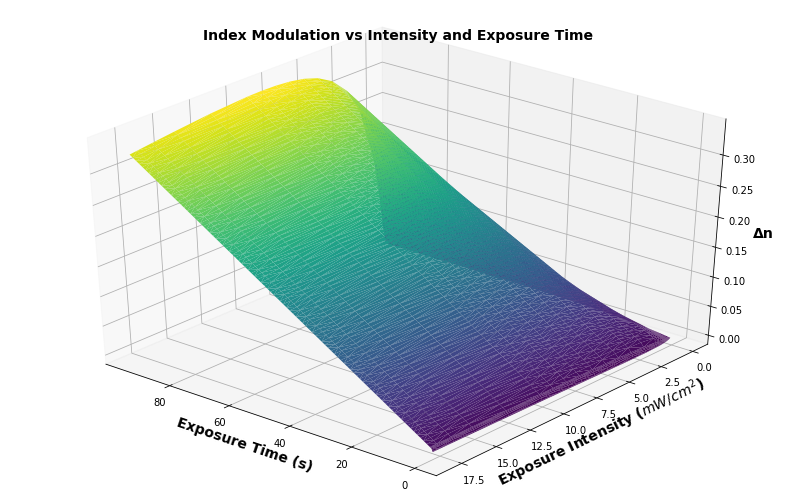

In [7]:
#Make a 3d surface plot of the dataframe in the previous cell
#Name the figure and assign size to the figure
fig = plt.figure(figsize =(14, 9))
ax = fig.gca(projection='3d')
#Plot the data and set the desired properties
ax.plot_trisurf(df['Exposure_Time'], df['Exposure_Intensity'],df['Index_Modulation'], cmap=plt.cm.viridis, linewidth=0.2)
ax.view_init(35, 130)
#fig.colorbar(surf, shrink=0.6, aspect=9)
ax.set_title('Index Modulation vs Intensity and Exposure Time', fontsize=14, fontweight="bold");
ax.set_ylabel('Exposure Intensity ($mW/cm^2$)', fontsize=14, fontweight="bold")
ax.set_xlabel('Exposure Time (s)', fontsize=14, fontweight="bold")
ax.set_zlabel('Δn', fontsize=14, fontweight="bold");

#Save the plot with the specified name below including the current date and time
plt.savefig('Piazzolla Diffusion Model' + date + '.jpeg', bbox_inches='tight') #can be .pdf,png, tif, jpeg, etc
plt.show()

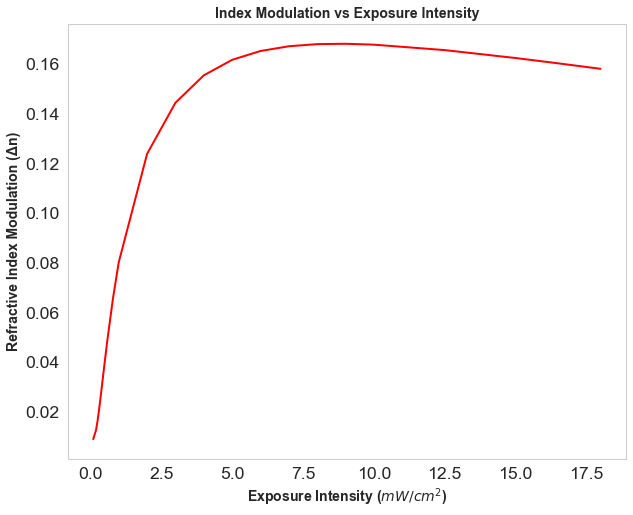

In [9]:
#Plot a line plot of index modulation vs exposure intensity
fig, (ax1) = plt.subplots(figsize=(10,8))

ax1 =sns.set(style='whitegrid', rc={"axes.labelsize":12})
paper_rc = {'lines.linewidth':2}
ax1 =sns.set_context("paper", font_scale=2, rc=paper_rc)
plt.grid(None)

ax1 = sns.lineplot(x = df['Exposure_Intensity'], y = df['Index_Modulation'], color="red", ci=None)
ax1.set_title('Index Modulation vs Exposure Intensity', fontsize=14, fontweight="bold");
ax1.set_xlabel('Exposure Intensity ($mW/cm^2$)', fontsize=14, fontweight="bold");
ax1.set_ylabel('Refractive Index Modulation (Δn)', fontsize=14, fontweight="bold");

plt.savefig('Piazzolla Diffusion Model plot' + date + '.jpeg', bbox_inches='tight') #can be .pdf,png, tif, jpeg, etc

### Kogelnik Coupled Wave Equation

##### On Bragg

In [21]:
#Convert the index modulation column from the dataframe to a list 
Delta_n = df['Index_Modulation'].to_list()
#Bragg angle for red beam, it is 12 for blue beam #EXTERNAL BRAGG
Bragg_angle_ext = np.deg2rad(18) 
#Converting angle to internal angle using snell's law
Bragg_angle_int = np.arcsin((1/1.5)*(np.sin(Bragg_angle_ext)))


#Define a function to compute diffraction efficiency
def onbragg(Lambda,Period,n_nut,phi,Delta_Lambda,L):
    K = (2*math.pi)/Period
    Beta = (2*math.pi*(n_nut))/Lambda
    nu = ((math.pi*df.Index_Modulation*L)/(Lambda)*((((np.cos(Bragg_angle_int)**2))-((K*np.cos(phi)*np.cos(Bragg_angle_int))/Beta))**0.5))
    DE_Kb = (np.sin(nu)**2)
#    print ("The Modulation Parameter on bragg is: ", nu)
#    print("Diffraction Efficiency at Bragg Condition is: ", DE_Kb)
    return DE_Kb 

In [22]:
#Vary wavelenth between blue and red (blue beam is on next cell, so that Bragg angle can be adjusted)
DE_Kb= onbragg(633e-9, 2e-6, 1.5, 90, 0, 25e-6)
df['Diffraction_Efficiency'] = DE_Kb #Diffraction efficiency for red beam at 25 um thickness and 2 um, unslanted

#red wavelenth but vary pitch from 0.5e-6 (in DE_Kb3) to 2e-6 (in DE_Kb4)
DE_Kb3= onbragg(633e-9, 0.5e-6, 1.5, 90, 0, 25e-6)
DE_Kb4= onbragg(633e-9, 2e-6, 1.5, 90, 0, 25e-6)
df['Diffraction_Efficiency_p1'] = DE_Kb3 #Diffraction efficiency at 0.5 um pitch
df['Diffraction_Efficiency_p2'] = DE_Kb4 #Diffraction efficiency at 2 um pitch

#vary thickness from 25 to 250 microns
DE_Kb5= onbragg(633e-9, 2e-6, 1.5, 90, 0, 25e-6)
DE_Kb6= onbragg(633e-9, 2e-6, 1.5, 90, 0, 50e-6)
DE_Kb7= onbragg(633e-9, 2e-6, 1.5, 90, 0, 100e-6)
DE_Kb8= onbragg(633e-9, 2e-6, 1.5, 90, 0, 250e-6)
DE_Kb9= onbragg(633e-9, 2e-6, 1.5, 90, 0, 200e-6)
df['Diffraction_Efficiency_L1'] = DE_Kb5 #Diffraction efficiency at 25 um thickness
df['Diffraction_Efficiency_L2'] = DE_Kb6 #Diffraction efficiency at 50 um thickness
df['Diffraction_Efficiency_L3'] = DE_Kb7 #Diffraction efficiency at 100 um thickness
df['Diffraction_Efficiency_L4'] = DE_Kb8 #Diffraction efficiency at 250 um thickness
df['Diffraction_Efficiency_L5'] = DE_Kb9 #Diffraction efficiency at 200 um thickness

In [23]:
#Repeat diffraction efficiency calculation for blue beam, changing Bragg angle to 12 degree
Delta_n = df['Index_Modulation'].to_list()
Bragg_angle_ext = np.deg2rad(12) #Bragg angle for red beam, it is 12 for blue beam #EXTERNAL BRAGG
Bragg_angle_int = np.arcsin((1/1.5)*(np.sin(Bragg_angle_ext)))

def onbragg2(Lambda,Period,n_nut,phi,Delta_Lambda,L):
    K = (2*math.pi)/Period
    Beta = (2*math.pi*(n_nut))/Lambda
    nu = ((math.pi*df.Index_Modulation*L)/(Lambda)*((((np.cos(Bragg_angle_int)**2))-((K*np.cos(phi)*np.cos(Bragg_angle_int))/Beta))**0.5))
    DE_Kb = (np.sin(nu)**2)
#    print ("The Modulation Parameter on bragg is: ", nu)
#    print("Diffraction Efficiency at Bragg Condition is: ", DE_Kb)
    return DE_Kb 
    

#Vary wavelenth between blue and red
DE_Kb2= onbragg2(405e-9, 2e-6, 1.5, 90, 0, 25e-6)
df['Diffraction_Efficiency2'] = DE_Kb2 #Diffraction efficiency for blue beam at 25 um thickness and 2 um, unslanted
df.head()

,Exposure_Time,Exposure_Intensity,Index_Modulation,Diffraction_Efficiency,Diffraction_Efficiency_p1,Diffraction_Efficiency_p2,Diffraction_Efficiency_L1,Diffraction_Efficiency_L2,Diffraction_Efficiency_L3,Diffraction_Efficiency_L4,Diffraction_Efficiency_L5,Diffraction_Efficiency2
0,0.15,0.10,-0.002236,0.078690,0.098778,0.078690,0.078690,0.289991,0.823584,0.086356,0.581173,0.183287
1,0.15,0.20,-0.003599,0.195130,0.242125,0.195130,0.195130,0.628217,0.934241,0.981330,0.245738,0.426770
2,0.15,0.25,-0.004118,0.249994,0.308369,0.249994,0.249994,0.749989,0.750023,0.750057,0.749954,0.529277
3,0.15,0.30,-0.004562,0.300393,0.368409,0.300393,0.300393,0.840629,0.535889,0.215290,0.994848,0.616100
4,0.15,0.35,-0.004946,0.346045,0.422067,0.346045,0.346045,0.905192,0.343278,0.000034,0.901753,0.688382


In [24]:
#Filter data based on intensity of interest. The different numbers represent intensity datapoints to be extracted from the dataframe
df1 = df.loc[df['Exposure_Intensity'] == 0.1]
df2 = df.loc[df['Exposure_Intensity'] == 0.25]
df3 = df.loc[df['Exposure_Intensity'] == 0.3]
df4 = df.loc[df['Exposure_Intensity'] == 0.4]
df5 = df.loc[df['Exposure_Intensity'] == 0.5]
df6 = df.loc[df['Exposure_Intensity'] == 0.6]

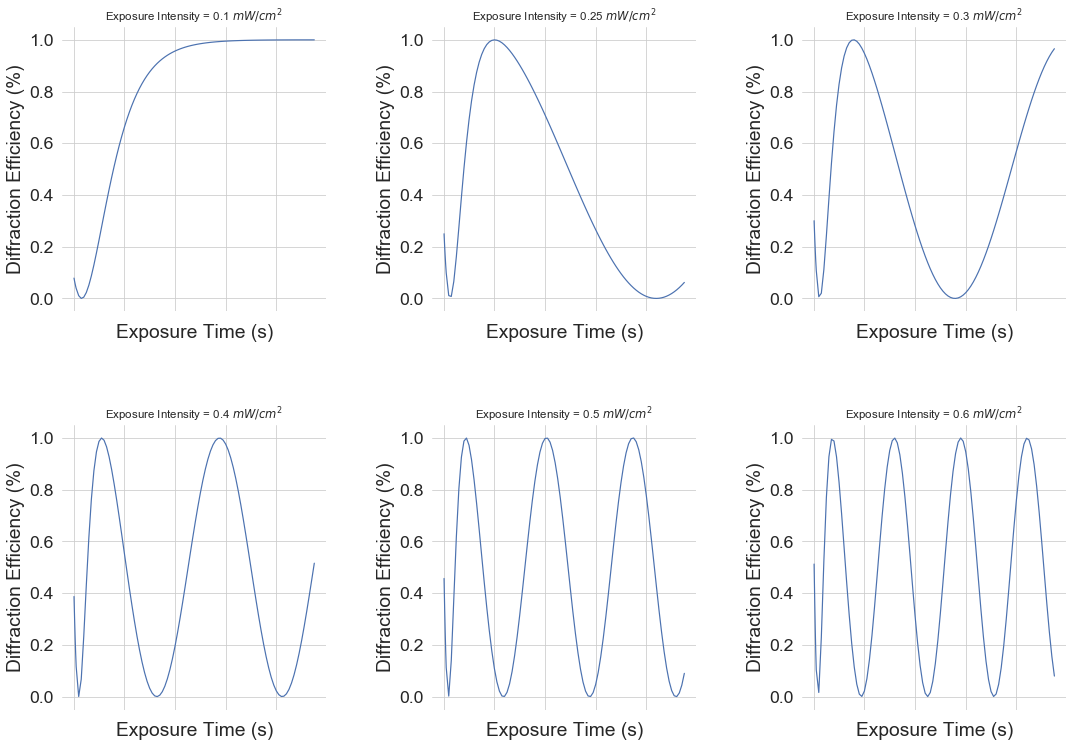

In [25]:
#Check the modulation behaviour at different intensity as a function of time 
fig, axs = plt.subplots(figsize=(18,12), ncols=3, nrows=2)
sns.set(style='whitegrid', rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":10})
sns.set_context("paper", font_scale=1.2)


sns.lineplot(x = df1["Exposure_Time"], y = df1["Diffraction_Efficiency"], ax=axs[0][0]).set(title="Exposure Intensity = 0.1 $mW/cm^2$", xlabel="Exposure Time (s)")
sns.lineplot(x = df2["Exposure_Time"], y = df2["Diffraction_Efficiency"], ax=axs[0][1]).set(title="Exposure Intensity = 0.25 $mW/cm^2$", xlabel="Exposure Time (s)")
sns.lineplot(x = df3["Exposure_Time"], y = df3["Diffraction_Efficiency"], ax=axs[0][2]).set(title="Exposure Intensity = 0.3 $mW/cm^2$", xlabel="Exposure Time (s)")
sns.lineplot(x = df4["Exposure_Time"], y = df4["Diffraction_Efficiency"], ax=axs[1][0]).set(title="Exposure Intensity = 0.4 $mW/cm^2$", xlabel="Exposure Time (s)")
sns.lineplot(x = df5["Exposure_Time"], y = df5["Diffraction_Efficiency"], ax=axs[1][1]).set(title="Exposure Intensity = 0.5 $mW/cm^2$", xlabel="Exposure Time (s)")
sns.lineplot(x = df6["Exposure_Time"], y = df6["Diffraction_Efficiency"], ax=axs[1][2]).set(title="Exposure Intensity = 0.6 $mW/cm^2$", xlabel="Exposure Time (s)")


plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.4, wspace=0.4)

   

for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right', fontweight='light', fontsize='small');
    ax.set_ylabel("Diffraction Efficiency (%)")
    
sns.despine(left=True, bottom=True)                                                   

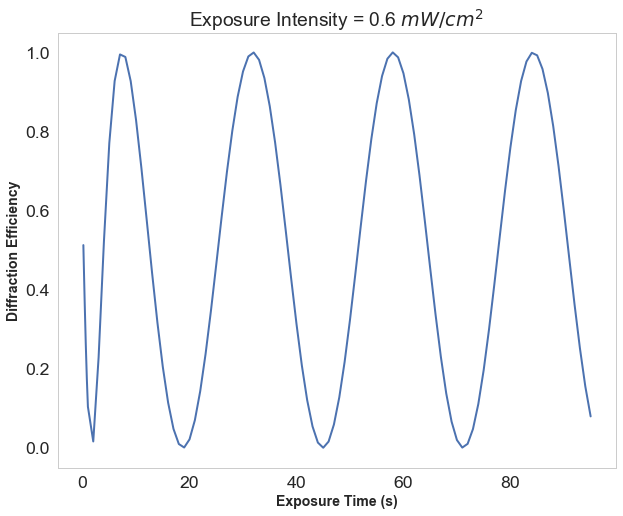

In [35]:
#Plot a line plot of index modulation vs exposure intensity
fig, (ax1) = plt.subplots(figsize=(10,8))

ax1 =sns.set(style='whitegrid', rc={"axes.labelsize":12})
paper_rc = {'lines.linewidth':2}
ax1 =sns.set_context("paper", font_scale=2, rc=paper_rc)
plt.grid(None)

ax1 = sns.lineplot(x = df6["Exposure_Time"], y = df6["Diffraction_Efficiency"]).set(title="Exposure Intensity = 0.6 $mW/cm^2$", xlabel="Exposure Time (s)")
#ax1.set_title('Index Modulation vs Exposure Intensity', fontsize=14, fontweight="bold");
plt.xlabel('Exposure Time (s)', fontsize=14, fontweight="bold");
plt.ylabel('Diffraction Efficiency', fontsize=14, fontweight="bold");

#plt.savefig('Piazzolla Diffusion Model plot' + date + '.jpeg', bbox_inches='tight') #can be .pdf,png, tif, jpeg, etc

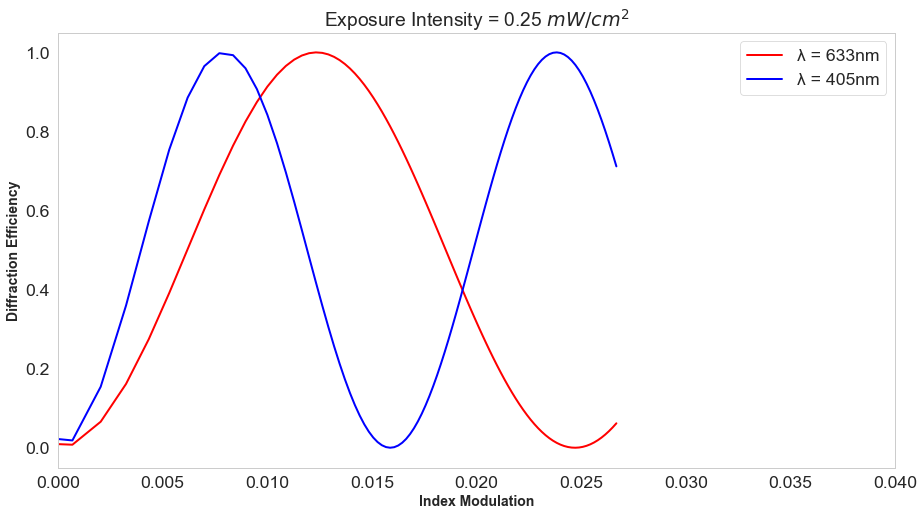

In [41]:
#Plot a line plot of index modulation vs exposure intensity
fig, (ax1) = plt.subplots(figsize=(15,8))

ax1 =sns.set(style='whitegrid', rc={"axes.labelsize":12})
paper_rc = {'lines.linewidth':2}
ax1 =sns.set_context("paper", font_scale=2, rc=paper_rc)
plt.grid(None)

ax1 = sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency"], label="λ = 633nm", color = "red").set(title="Exposure Intensity = 0.25 $mW/cm^2$", xlabel="Index Modulation")#ax1.set_title('Index Modulation vs Exposure Intensity', fontsize=14, fontweight="bold");
ax1 = sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency2"], label="λ = 405nm", color = "blue")
plt.xlim(0,0.04);
plt.xlabel('Index Modulation', fontsize=14, fontweight="bold");
plt.ylabel('Diffraction Efficiency', fontsize=14, fontweight="bold");

#plt.savefig('Piazzolla Diffusion Model plot' + date + '.jpeg', bbox_inches='tight') #can be .pdf,png, tif, jpeg, etc

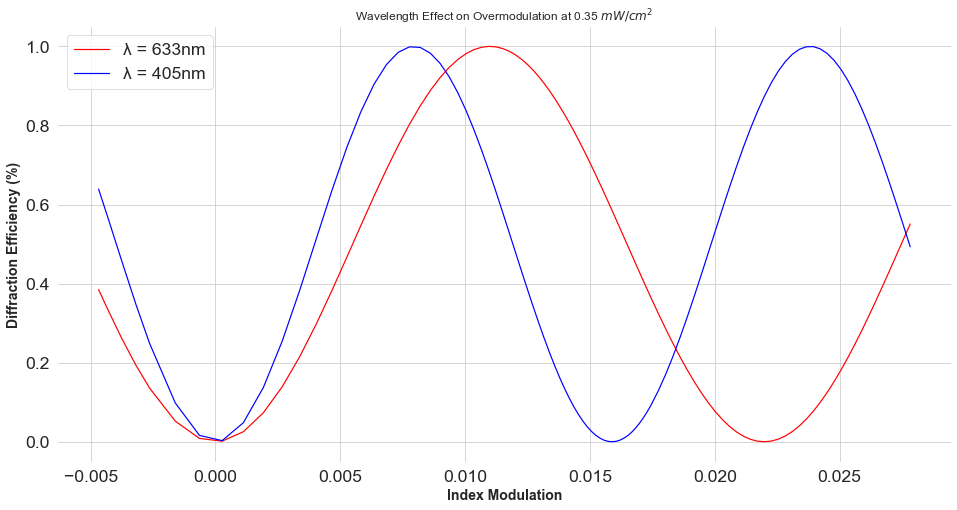

In [16]:
fig, (ax) = plt.subplots(figsize=(16,8))

ax =sns.set(style='whitegrid', rc={"axes.labelsize":14})
ax =sns.set_context("paper", font_scale=2)


sns.lineplot(x = df3["Index_Modulation"], y = df3["Diffraction_Efficiency_p1"], label="λ = 633nm", color="red")
sns.lineplot(x = df3["Index_Modulation"], y = df3["Diffraction_Efficiency2"], label="λ = 405nm", color = "blue")
#sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency_L3"], label="Thickness = 100μm")

#plt.grid(False);
plt.title("Wavelength Effect on Overmodulation at 0.35 $mW/cm^2$", fontsize=12)
plt.ylabel("Diffraction Efficiency (%)", fontsize=14, fontweight="bold")
plt.xlabel("Index Modulation", fontsize=14, fontweight="bold");
#plt.xlim(-0.002, 0.03);
plt.legend(loc='best')
 

sns.despine(left=True, bottom=True)
plt.savefig('Figure6a' + date + '.tif', bbox_inches='tight') #can be .pdf,png, tif, jpeg, etc)  
plt.show()

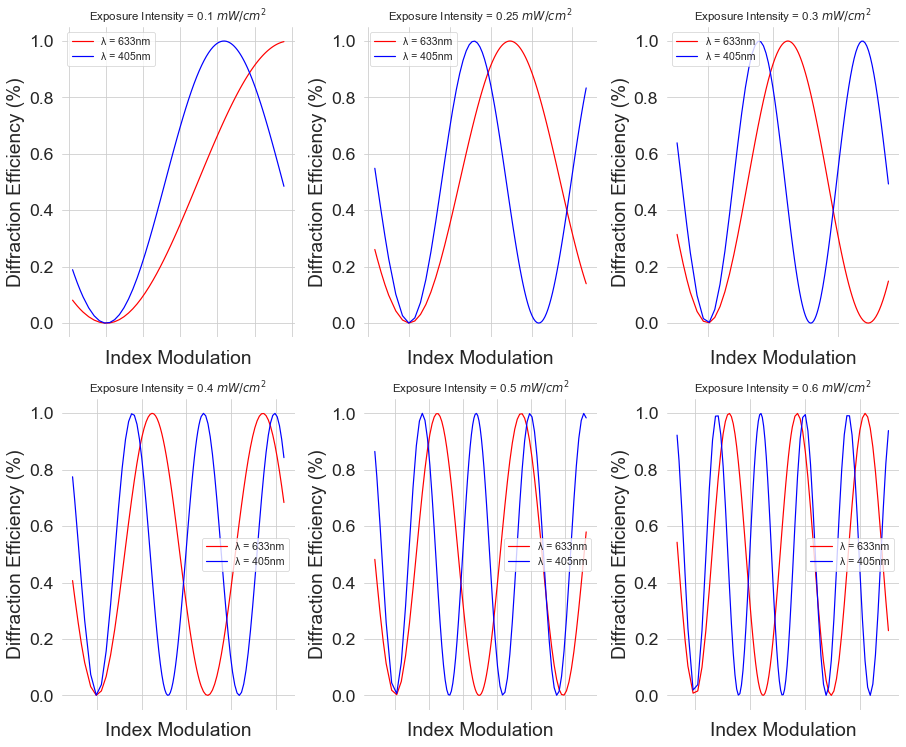

In [17]:
#Diffraction efficiency vs index modulation plot at different exposure intensity
fig, axs = plt.subplots(figsize=(15,12), ncols=3, nrows=2)
sns.set(style='whitegrid', rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":10})
sns.set_context("paper", font_scale=1.2)

sns.lineplot(x = df1["Index_Modulation"], y = df1["Diffraction_Efficiency"], label="λ = 633nm", color = "red", ax=axs[0][0]).set(title="Exposure Intensity = 0.1 $mW/cm^2$", xlabel="Index Modulation")
sns.lineplot(x = df1["Index_Modulation"], y = df1["Diffraction_Efficiency2"], label="λ = 405nm", color = "blue", ax=axs[0][0])
sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency"], label="λ = 633nm", color = "red", ax=axs[0][1]).set(title="Exposure Intensity = 0.25 $mW/cm^2$", xlabel="Index Modulation")
sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency2"], label="λ = 405nm", color = "blue", ax=axs[0][1])
sns.lineplot(x = df3["Index_Modulation"], y = df3["Diffraction_Efficiency"], label="λ = 633nm", color = "red", ax=axs[0][2]).set(title="Exposure Intensity = 0.3 $mW/cm^2$", xlabel="Index Modulation")
sns.lineplot(x = df3["Index_Modulation"], y = df3["Diffraction_Efficiency2"], label="λ = 405nm", color = "blue", ax=axs[0][2])
sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency"], label="λ = 633nm", color = "red", ax=axs[1][0]).set(title="Exposure Intensity = 0.4 $mW/cm^2$", xlabel="Index Modulation")
sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency2"], label="λ = 405nm", color = "blue", ax=axs[1][0])
sns.lineplot(x = df5["Index_Modulation"], y = df5["Diffraction_Efficiency"], label="λ = 633nm", color = "red", ax=axs[1][1]).set(title="Exposure Intensity = 0.5 $mW/cm^2$", xlabel="Index Modulation")
sns.lineplot(x = df5["Index_Modulation"], y = df5["Diffraction_Efficiency2"], label="λ = 405nm", color = "blue", ax=axs[1][1])
sns.lineplot(x = df6["Index_Modulation"], y = df6["Diffraction_Efficiency"], label="λ = 633nm", color = "red", ax=axs[1][2]).set(title="Exposure Intensity = 0.6 $mW/cm^2$", xlabel="Index Modulation")
sns.lineplot(x = df6["Index_Modulation"], y = df6["Diffraction_Efficiency2"], label="λ = 405nm", color = "blue", ax=axs[1][2])

plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.2, wspace=0.3)

   

for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right', fontweight='light', fontsize='small');
    ax.set_ylabel("Diffraction Efficiency (%)")
    ax.set_xlabel("Index Modulation")
    
sns.despine(left=True, bottom=True)  

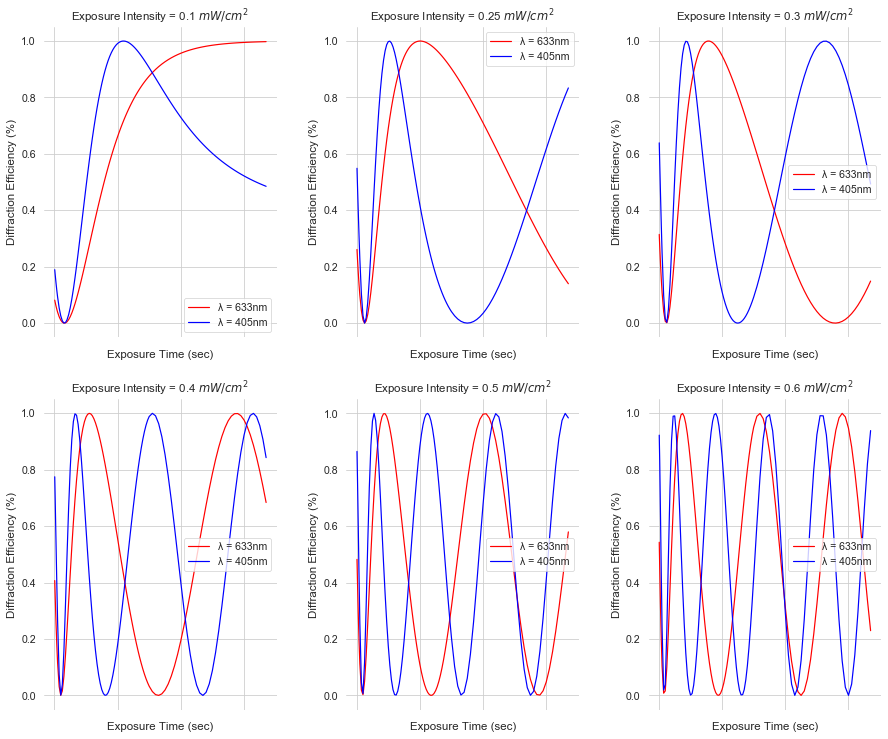

In [18]:
#Diffraction efficiency vs exposure time plot at different exposure intensity. Compare the red and blue wavelength
fig, axs = plt.subplots(figsize=(15,12), ncols=3, nrows=2)
sns.set(style='whitegrid', rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":10})
sns.set_context("paper", font_scale=1.2)

sns.lineplot(x = df1["Exposure_Time"], y = df1["Diffraction_Efficiency"], label="λ = 633nm", color = "red", ax=axs[0][0]).set(title="Exposure Intensity = 0.1 $mW/cm^2$", xlabel="Exposure Time")
sns.lineplot(x = df1["Exposure_Time"], y = df1["Diffraction_Efficiency2"], label="λ = 405nm", color = "blue", ax=axs[0][0])
sns.lineplot(x = df2["Exposure_Time"], y = df2["Diffraction_Efficiency"], label="λ = 633nm", color = "red", ax=axs[0][1]).set(title="Exposure Intensity = 0.25 $mW/cm^2$", xlabel="Exposure Time")
sns.lineplot(x = df2["Exposure_Time"], y = df2["Diffraction_Efficiency2"], label="λ = 405nm", color = "blue", ax=axs[0][1])
sns.lineplot(x = df3["Exposure_Time"], y = df3["Diffraction_Efficiency"], label="λ = 633nm", color = "red", ax=axs[0][2]).set(title="Exposure Intensity = 0.3 $mW/cm^2$", xlabel="Exposure Time")
sns.lineplot(x = df3["Exposure_Time"], y = df3["Diffraction_Efficiency2"], label="λ = 405nm", color = "blue", ax=axs[0][2])
sns.lineplot(x = df4["Exposure_Time"], y = df4["Diffraction_Efficiency"], label="λ = 633nm", color = "red", ax=axs[1][0]).set(title="Exposure Intensity = 0.4 $mW/cm^2$", xlabel="Exposure Time")
sns.lineplot(x = df4["Exposure_Time"], y = df4["Diffraction_Efficiency2"], label="λ = 405nm", color = "blue", ax=axs[1][0])
sns.lineplot(x = df5["Exposure_Time"], y = df5["Diffraction_Efficiency"], label="λ = 633nm", color = "red", ax=axs[1][1]).set(title="Exposure Intensity = 0.5 $mW/cm^2$", xlabel="Exposure Time")
sns.lineplot(x = df5["Exposure_Time"], y = df5["Diffraction_Efficiency2"], label="λ = 405nm", color = "blue", ax=axs[1][1])
sns.lineplot(x = df6["Exposure_Time"], y = df6["Diffraction_Efficiency"], label="λ = 633nm", color = "red", ax=axs[1][2]).set(title="Exposure Intensity = 0.6 $mW/cm^2$", xlabel="Exposure Time")
sns.lineplot(x = df6["Exposure_Time"], y = df6["Diffraction_Efficiency2"], label="λ = 405nm", color = "blue", ax=axs[1][2])

plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.2, wspace=0.3)

   

for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right', fontweight='light', fontsize='small');
    ax.set_ylabel("Diffraction Efficiency (%)")
    ax.set_xlabel("Exposure Time (sec)")
    
sns.despine(left=True, bottom=True)  

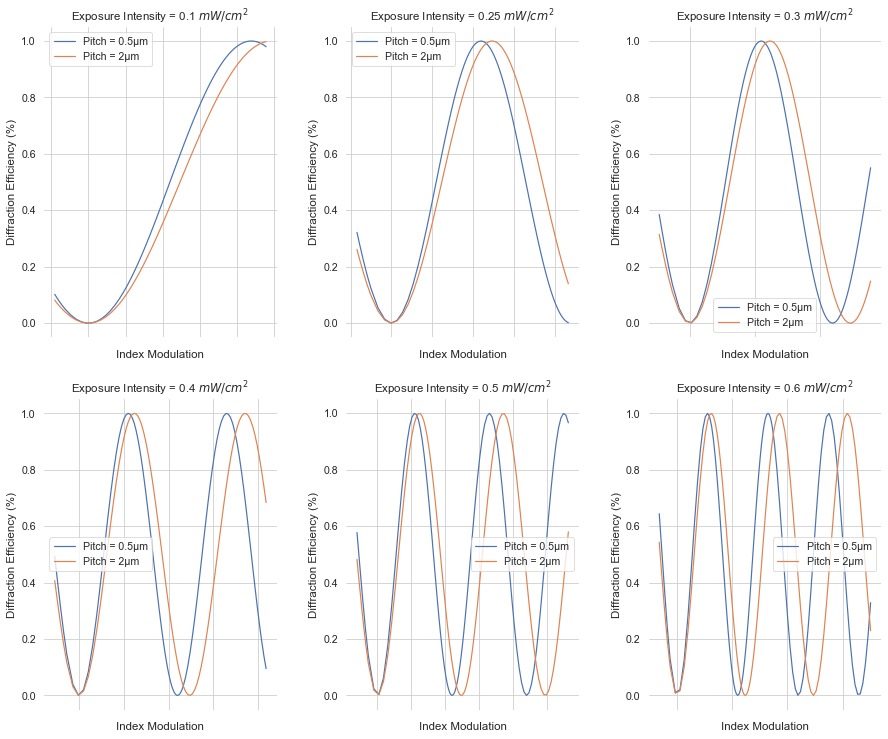

In [19]:
fig, axs = plt.subplots(figsize=(15,12), ncols=3, nrows=2)
sns.set(style='whitegrid', rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":10})
sns.set_context("paper", font_scale=1.2)


sns.lineplot(x = df1["Index_Modulation"], y = df1["Diffraction_Efficiency_p1"], label="Pitch = 0.5μm", ax=axs[0][0])
sns.lineplot(x = df1["Index_Modulation"], y = df1["Diffraction_Efficiency_p2"], label="Pitch = 2μm", ax=axs[0][0]).set(title="Exposure Intensity = 0.1 $mW/cm^2$", xlabel="Exposure Time (s)")
sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency_p1"], label="Pitch = 0.5μm", ax=axs[0][1])
sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency_p2"], label="Pitch = 2μm", ax=axs[0][1]).set(title="Exposure Intensity = 0.25 $mW/cm^2$", xlabel="Exposure Time (s)")
sns.lineplot(x = df3["Index_Modulation"], y = df3["Diffraction_Efficiency_p1"], label="Pitch = 0.5μm", ax=axs[0][2])
sns.lineplot(x = df3["Index_Modulation"], y = df3["Diffraction_Efficiency_p2"], label="Pitch = 2μm", ax=axs[0][2]).set(title="Exposure Intensity = 0.3 $mW/cm^2$", xlabel="Exposure Time (s)")
sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency_p1"], label="Pitch = 0.5μm", ax=axs[1][0])
sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency_p2"], label="Pitch = 2μm", ax=axs[1][0]).set(title="Exposure Intensity = 0.4 $mW/cm^2$", xlabel="Index Modulation")
sns.lineplot(x = df5["Index_Modulation"], y = df5["Diffraction_Efficiency_p1"], label="Pitch = 0.5μm", ax=axs[1][1])
sns.lineplot(x = df5["Index_Modulation"], y = df5["Diffraction_Efficiency_p2"], label="Pitch = 2μm", ax=axs[1][1]).set(title="Exposure Intensity = 0.5 $mW/cm^2$", xlabel="Index Modulation")
sns.lineplot(x = df6["Index_Modulation"], y = df6["Diffraction_Efficiency_p1"], label="Pitch = 0.5μm", ax=axs[1][2])
sns.lineplot(x = df6["Index_Modulation"], y = df6["Diffraction_Efficiency_p2"], label="Pitch = 2μm", ax=axs[1][2]).set(title="Exposure Intensity = 0.6 $mW/cm^2$", xlabel="Index Modulation")


plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.2, wspace=0.3)

   

for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right', fontweight='light', fontsize='small');
    ax.set_ylabel("Diffraction Efficiency (%)")
    ax.set_xlabel("Index Modulation")
    
sns.despine(left=True, bottom=True)                                                   

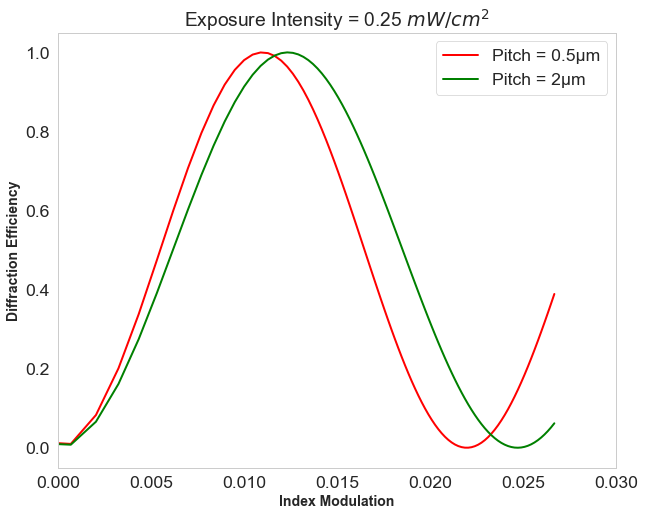

In [49]:
#Plot a line plot of efficiency vs index modulation comparing pitch
fig, (ax1) = plt.subplots(figsize=(10,8))

ax1 =sns.set(style='whitegrid', rc={"axes.labelsize":12})
paper_rc = {'lines.linewidth':2}
ax1 =sns.set_context("paper", font_scale=2, rc=paper_rc)
plt.grid(None)

ax1 = sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency_p1"], color="red", label="Pitch = 0.5μm")
ax1 = sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency_p2"], color="green", label="Pitch = 2μm").set(title="Exposure Intensity = 0.25 $mW/cm^2$", xlabel="Exposure Time (s)")

plt.xlim(0,0.03)
plt.xlabel('Index Modulation', fontsize=14, fontweight="bold");
plt.ylabel('Diffraction Efficiency', fontsize=14, fontweight="bold");

#plt.savefig('Piazzolla Diffusion Model plot' + date + '.jpeg', bbox_inches='tight') #can be .pdf,png, tif, jpeg, etc

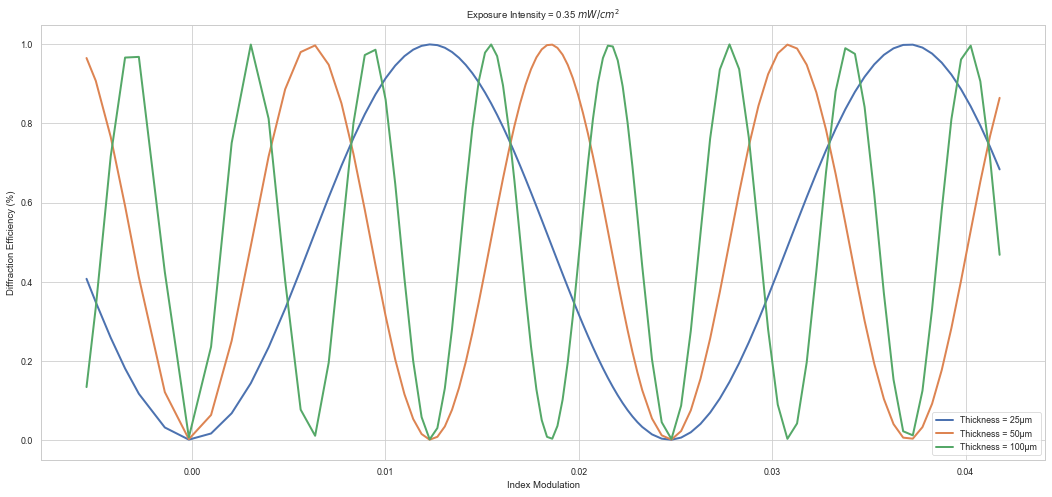

In [20]:
plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")                                                 
paper_rc = {'lines.linewidth': 2}                  
sns.set_context("paper", rc = paper_rc)

sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency_L1"], label="Thickness = 25μm")
sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency_L2"], label="Thickness = 50μm")
sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency_L3"], label="Thickness = 100μm").set(title="Exposure Intensity = 0.35 $mW/cm^2$", xlabel="Index Modulation", ylabel="Diffraction Efficiency (%)");
#sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency_L4"], label="Thickness = 250μm")



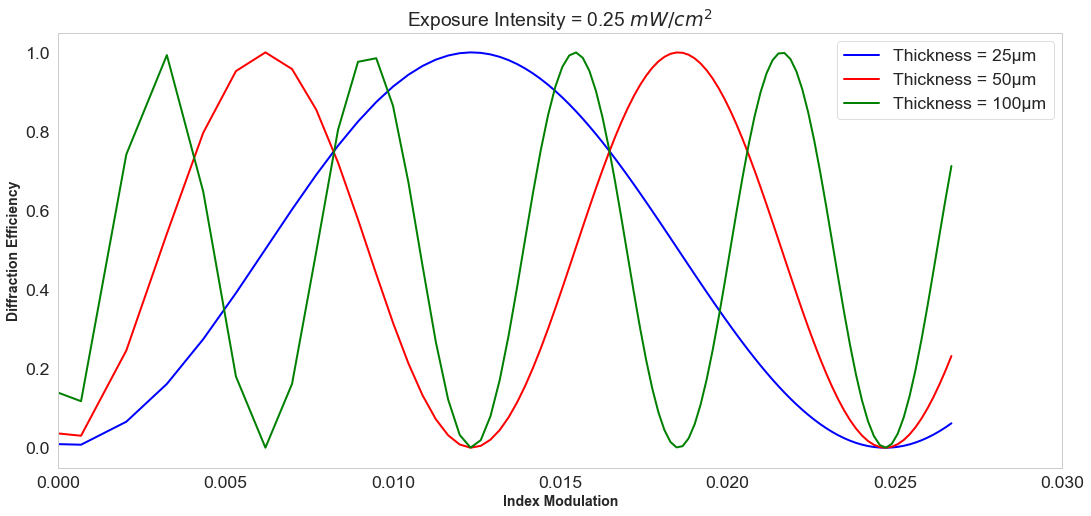

In [51]:
plt.figure(figsize=(18, 8))

ax1 =sns.set(style='whitegrid', rc={"axes.labelsize":12})
paper_rc = {'lines.linewidth':2}
ax1 =sns.set_context("paper", font_scale=2, rc=paper_rc)
plt.grid(None)

sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency_L1"], color="blue", label="Thickness = 25μm")
sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency_L2"], color="red", label="Thickness = 50μm")
sns.lineplot(x = df2["Index_Modulation"], y = df2["Diffraction_Efficiency_L3"], color="green", label="Thickness = 100μm").set(title="Exposure Intensity = 0.25 $mW/cm^2$");
#sns.lineplot(x = df4["Index_Modulation"], y = df4["Diffraction_Efficiency_L4"], label="Thickness = 250μm")

plt.xlim(0,0.03)
plt.xlabel('Index Modulation', fontsize=14, fontweight="bold");
plt.ylabel('Diffraction Efficiency', fontsize=14, fontweight="bold");